
# QBITS Basic Utility

##  Session 5_1 Simple error Qbit Sigth

### UDL + 5E Model — Duration: 2 hours

---

## 1 Engage — Connect with Experience

> “You carefully align a compass so that it points exactly north.  
> Suddenly, a weak and irregular magnetic field appears nearby.  
> The compass does not flip randomly — instead, it **slowly drifts**,  
> ending up slightly misaligned from its original direction.”

> “Nothing broke.  
> Nothing jumped from 0 to 1.  
> The compass simply rotated… without your permission.”

**Guiding Questions:**
- Does the compass stop being valid, or is it just misaligned?
- Is the error sudden, or does it accumulate gradually?
- If you did not notice the rotation immediately, would the error still matter?

**Brief Activity (Warm-up):**
- Draw a single arrow on the board pointing “north”.
- Slowly rotate it by a small angle (5–10 degrees).
- Ask teachers: *At what point does this become a problem?*

---

### Physical Concept

In real physical systems, most errors are **not abrupt failures**,  
but **small continuous deviations** caused by environmental interaction.

- Magnetic fluctuations
- Temperature changes
- Imperfect isolation

In quantum systems, these effects appear as **unintended rotations of the state**.

---

### Learning Objective

- Recognize quantum error as a **continuous physical process**, not a digital fault.
- Connect classical intuition (rotation, drift) with quantum state evolution.
- Prepare the conceptual ground for understanding noise in real quantum circuits.


## 2 Explore — Physical and Conceptual Exploration (No Code)

> *The goal of this phase is to build intuition before introducing quantum gates or equations.*

---

### Board Representation

- Draw a **circle** representing the Bloch sphere (top view).
- Place a single arrow starting at the “north” direction.
- Label it: **Ideal State**.

Now:
- Slightly rotate the arrow by a small angle ε.
- Label the new position: **Perturbed State**.

> Emphasize: the system is still a valid state — just not the intended one.

---

### Guided Thought Experiment

Ask  to imagine:
1. The arrow rotates by a tiny amount every second.
2. Each rotation is barely noticeable.
3. After some time, the arrow points somewhere else entirely.

Discussion prompts:
- When did the error actually occur?
- Could we detect it immediately?
- Is the system ever “broken”, or just drifting?

---

### Physical Analogy

- The compass is isolated, but **not perfectly**.
- The environment does not flip it — it **nudges it**.
- Many small nudges accumulate into a visible deviation.

> This is the key intuition behind quantum noise.

---

### Exploration Questions

- Why is it misleading to think of quantum error as “bit flipping” only?
- What does it mean to “protect” a direction instead of a value?
- How might we notice a rotation without directly measuring the arrow?

---

### Exploration Objective

Build a shared understanding that:
- Quantum errors are often **rotational**.
- Errors accumulate continuously.
- Correction requires **comparison**, not immediate measurement.

> *Do not introduce gates, matrices, or code yet.*  
> *Let the physical intuition settle first.*


# 3 Explain — Quantum Errors as Unintended Rotations (1 Qubit)

>### From Classical Direction to Quantum State

In classical physics, the state of a compass is defined by a **direction**.
In quantum mechanics, the state of a qubit is defined by a **direction in state space**.

This space is represented by the **Bloch sphere**.

- The north pole represents the state |0⟩
- The south pole represents the state |1⟩
- Any point on the sphere surface represents a valid quantum state

> A quantum state is not a point on a line, but a **direction in three-dimensional space**.

>### The General State of a Qubit

Any single-qubit pure state can be written as:

|ψ⟩ = cos(θ/2)|0⟩ + e^{iφ} sin(θ/2)|1⟩

Where:
- θ controls the **latitude** (how much |0⟩ vs |1⟩)
- φ controls the **longitude** (the phase)

This means:
- Changing θ moves the state **up or down**
- Changing φ rotates the state **around the vertical axis**

A qubit is fully described by **angles**, not by bits.

>### Quantum Gates as Rotations

Single-qubit quantum gates are **rotations of the Bloch sphere**.

| Gate | Axis of rotation | Physical meaning |
|-----|-----------------|------------------|
| Rx(θ) | X-axis | Rotation mixing |0⟩ and |1⟩ |
| Ry(θ) | Y-axis | Change of population between |0⟩ and |1⟩ |
| Rz(θ) | Z-axis | Phase rotation (no population change) |

> Gates do not “set values” — they **rotate states**.

> ### What Is a Quantum Error?

A quantum error is often **not**:
- A sudden flip |0⟩ → |1⟩
- A discrete mistake

A quantum error **is**:
- A small, unintended rotation
- Caused by interaction with the environment

Examples:
- A stray magnetic field → unwanted Rz(ε)
- Control imprecision → slightly wrong Rx(θ + ε)
- Timing error → over-rotation

> The qubit remains valid, but it points in the wrong direction.

>### Error Accumulation

Small rotations accumulate over time.

- One tiny rotation may be negligible
- Many tiny rotations change the state significantly

This explains why:
- Short circuits work better than long ones
- Deep circuits amplify noise
- Error is a **process**, not an event

>### Why Measurement Does Not Help (Yet)

Measuring the qubit:
- Destroys phase information
- Collapses the state
- Does not reveal *how* the rotation occurred

> We cannot “check” a qubit without disturbing it.

This is why quantum error correction:
- Avoids direct measurement of the state
- Relies on **indirect information** (syndromes)

But first, we must understand rotation.

>### Teachers Advise

- Quantum gates are rotations
- Noise appears as unintended rotations
- Errors are continuous, not digital
- Correction requires structure, not inspection

> Before correcting quantum errors,  
> we must learn how they **move** states.




## 4 Elaborate — Visualize Rotations and Errors (1 Qubit)

### Step 1 — Ideal Rotation

We will apply a perfect **Ry** rotation to the qubit.  
This will simulate a qubit rotation in the **Y-axis** of the Bloch sphere. We start with an initial state of |0⟩.

```python
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
theta = 1.1  # The angle for the ideal rotation
simulator = AerSimulator() # Use the modern AerSimulator

# Step 1: Prepare a quantum circuit with 1 qubit
qc_ideal = QuantumCircuit(1)
qc_ideal.ry(theta, 0)  # Apply a perfect Ry rotation
qc_ideal.save_statevector()  # Save the final state

# Step 2: Simulate the circuit using .run() and .result()
# We don't need 'transpile' for a 1-qubit statevector sim, can run directly
result = simulator.run(qc_ideal).result()

# Step 3: Retrieve the statevector and visualize
statevector_ideal = result.get_statevector(qc_ideal)

# Plot the Bloch vector of the ideal state
plot_bloch_multivector(statevector_ideal, title="Ideal State of Qubit (Ry)")



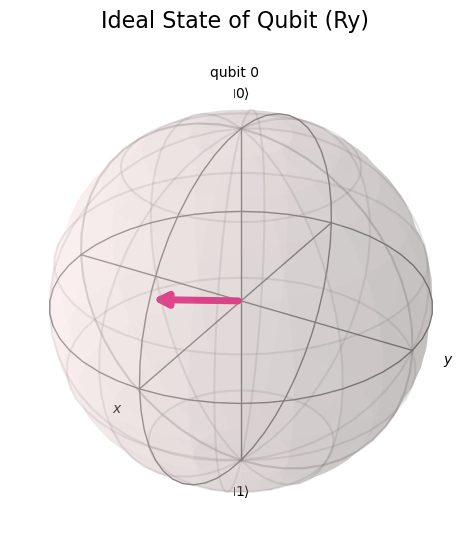

In [14]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np

# --- CONFIGURATION ---
theta = 1.1  # The angle for the ideal rotation
simulator = AerSimulator() # Use the modern AerSimulator

# Step 1: Prepare a quantum circuit with 1 qubit
qc_ideal = QuantumCircuit(1)
qc_ideal.ry(theta, 0)  # Apply a perfect Ry rotation
qc_ideal.save_statevector()  # Save the final state

# Step 2: Simulate the circuit using .run() and .result()
# We don't need 'transpile' for a 1-qubit statevector sim, can run directly
result = simulator.run(qc_ideal).result()

# Step 3: Retrieve the statevector and visualize
statevector_ideal = result.get_statevector(qc_ideal)

# Plot the Bloch vector of the ideal state
plot_bloch_multivector(statevector_ideal, title="Ideal State of Qubit (Ry)")

### Step 2 — Introduce Rotation Error

Next, we will simulate an error in the rotation.  
For this, we apply a slight **error in rotation** (e.g., by adding a small offset to the angle).

```python
# --- ERROR CONFIGURATION ---
theta_error = 1.1 + 0.05  # Introduce a slight error in the angle

# Step 1: Prepare a quantum circuit with 1 qubit
qc_error = QuantumCircuit(1)
qc_error.ry(theta_error, 0)  # Apply an erroneous Ry rotation
qc_error.save_statevector()  # Save the final state

# Step 2: Simulate the circuit
result_error = simulator.run(qc_error).result()

# Step 3: Retrieve the statevector and visualize
statevector_error = result_error.get_statevector(qc_error)

# Plot the Bloch vector of the erroneous state
plot_bloch_multivector(statevector_error, title="State with Rotation Error (Ry + 0.05)")


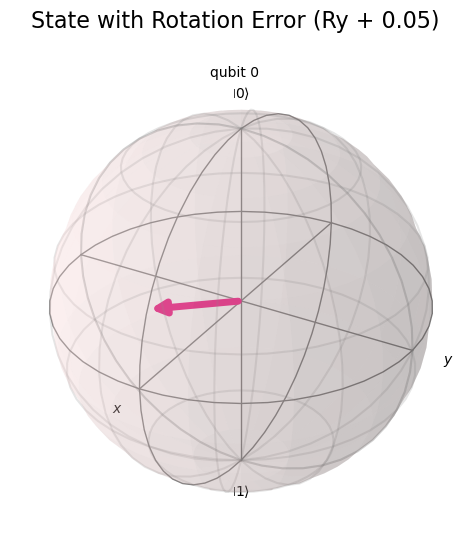

In [15]:
# --- ERROR CONFIGURATION ---
theta_error = 1.1 + 0.05  # Introduce a slight error in the angle

# Step 1: Prepare a quantum circuit with 1 qubit
qc_error = QuantumCircuit(1)
qc_error.ry(theta_error, 0)  # Apply an erroneous Ry rotation
qc_error.save_statevector()  # Save the final state

# Step 2: Simulate the circuit
result_error = simulator.run(qc_error).result()

# Step 3: Retrieve the statevector and visualize
statevector_error = result_error.get_statevector(qc_error)

# Plot the Bloch vector of the erroneous state
plot_bloch_multivector(statevector_error, title="State with Rotation Error (Ry + 0.05)")



### Step 3 — Compare the States

Now, let's compare the two Bloch vectors between Angle of rotation and Probabilities:  
1. **Ideal rotation**  
2. **Erroneous rotation**

```python
# --- 2D PLOTTING ---

# Extract probability amplitudes for the |0> and |1> states
# Statevector data is [amplitude_0, amplitude_1]
amp_0_ideal = np.abs(statevector_ideal.data[0])**2
amp_1_ideal = np.abs(statevector_ideal.data[1])**2

amp_0_error = np.abs(statevector_error.data[0])**2
amp_1_error = np.abs(statevector_error.data[1])**2

# Create a figure and axis for the 2D comparison
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ideal point
ax.scatter(theta, amp_1_ideal, color='blue', marker='o', s=100, label=f'Ideal ($\\theta={theta}$)')

# Plot the error point
ax.scatter(theta_error, amp_1_error, color='red', marker='x', s=100, label=f'Error ($\\theta={theta_error}$)')

# Add a line to show the general trend/how the amplitude changes with theta
thetas_range = np.linspace(0, np.pi, 100)
# Probability of measuring |1> is sin^2(theta/2)
ax.plot(thetas_range, np.sin(thetas_range / 2)**2, linestyle='--', color='gray', alpha=0.5, label='P(|1>) curve')


ax.set_xlabel('Rotation Angle $\\theta$ (Radians)')
ax.set_ylabel('Probability of Measuring $|1\\rangle$')
ax.set_title('Comparison of Qubit States in a 2D Plane (P(|1>) vs $\\theta$)')
ax.legend()
ax.grid(True)

plt.show()


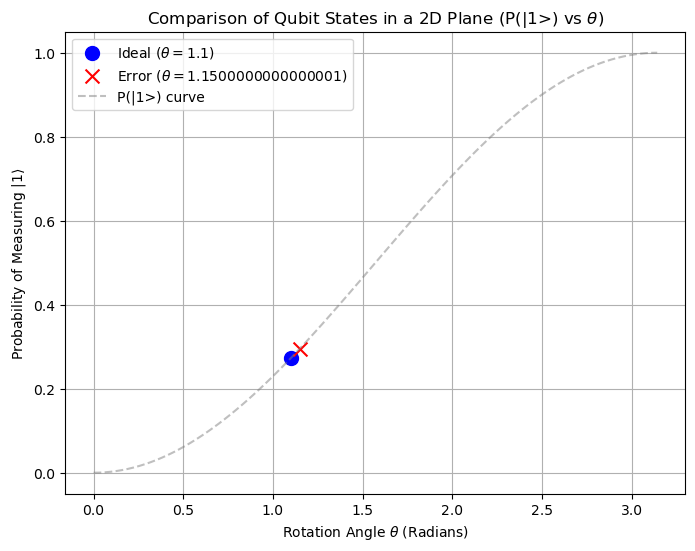

In [18]:
# --- 2D PLOTTING ---

# Extract probability amplitudes for the |0> and |1> states
# Statevector data is [amplitude_0, amplitude_1]
amp_0_ideal = np.abs(statevector_ideal.data[0])**2
amp_1_ideal = np.abs(statevector_ideal.data[1])**2

amp_0_error = np.abs(statevector_error.data[0])**2
amp_1_error = np.abs(statevector_error.data[1])**2

# Create a figure and axis for the 2D comparison
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ideal point
ax.scatter(theta, amp_1_ideal, color='blue', marker='o', s=100, label=f'Ideal ($\\theta={theta}$)')

# Plot the error point
ax.scatter(theta_error, amp_1_error, color='red', marker='x', s=100, label=f'Error ($\\theta={theta_error}$)')

# Add a line to show the general trend/how the amplitude changes with theta
thetas_range = np.linspace(0, np.pi, 100)
# Probability of measuring |1> is sin^2(theta/2)
ax.plot(thetas_range, np.sin(thetas_range / 2)**2, linestyle='--', color='gray', alpha=0.5, label='P(|1>) curve')


ax.set_xlabel('Rotation Angle $\\theta$ (Radians)')
ax.set_ylabel('Probability of Measuring $|1\\rangle$')
ax.set_title('Comparison of Qubit States in a 2D Plane (P(|1>) vs $\\theta$)')
ax.legend()
ax.grid(True)

plt.show()

### Teacher Advise

- The **ideal rotation** will result in a predictable change in the state on the Bloch sphere, corresponding to a well-defined angle.
- The **error in rotation** causes the state to be slightly misaligned, simulating a **quantum error**.
- In practice, these errors are not always so visible, but they accumulate over multiple operations, leading to **decoherence**.

> The key takeaway: **quantum gates cause rotations**, and **quantum errors are rotations too**, just unintended ones.


## 5 Evaluate — From Error Visualization to Error Compensation (1 Qubit)

### Observing the Error in a Measurable Way

In the previous steps, we visualized the qubit state on the Bloch sphere.  
Now, we move to a **simpler but extremely powerful representation**:

> **Rotation angle vs. probability of measurement**

Instead of looking at the full 3D geometry, we focus on a single observable:
\[
P(|1\rangle) = \sin^2\left(\frac{\theta}{2}\right)
\]

This allows us to **quantify** the effect of a rotation error.

### Understanding Errors as Miscalibrated Rotations

From this visualization, we learn:

- A rotation error is equivalent to applying the **wrong angle**.
- The system still follows the **same physical law**.
- The error manifests as a **systematic shift**, not randomness (yet).

In other words:

> **The qubit is still behaving correctly — just not as intended.**

### First Idea of Mitigation (Conceptual Only)

If the error shifts the angle from:
$
\theta \rightarrow \theta + \delta
$

Then a natural question emerges:

> *What if we apply a small counter-rotation to bring it back?*

Conceptually:
- Error → unintended rotation
- Compensation → corrective rotation

At this stage:
- We do **not** implement correction
- We only **recognize** that compensation is possible

### Teaching Key Questions 

- Is the error random or systematic?
- Can we detect the error from measurement statistics?
- What happens if the same error is applied many times?
- Would one qubit be enough to detect and correct it?

### Learning Outcome of This Session

By the end of this session, participants should understand that:

- Quantum errors can be modeled as **rotations**
- Errors are **measurable** through probabilities
- Visualization in 2D provides a bridge between geometry and statistics
- Error compensation is conceptually possible — but requires more resources

> This is the first step toward **quantum error correction**.

